# Summary of Lessons

## 1,2: Basics:

In [1]:
# Libraries
from math import exp, sqrt, pi

# Variables
x = 1.75

# Calculations
y = exp(-x**2/2) / sqrt(2*pi)

# Printing
print(f"The PDF of the standard normal distribution at x={x} is {y:.3}")

The PDF of the standard normal distribution at x=1.75 is 0.0863



## 3. Functions

In [2]:
# Built-in functions

p3 = round(pi, 3)
print(p3, pi)

3.142 3.141592653589793


In [3]:
# Defining a new function
def normal(x, mean=0, stdev=1):
    norm = 1 / ( stdev * sqrt(2*pi) )
    z = (x-mean)/stdev
    PDF = norm * exp(-z**2 / 2)
    return PDF,z

# "calling" a function
y,z = normal(2.75, mean=1)

print(z,y)

1.75 0.08627731882651153


## 4a. Conditionals

In [4]:
def discuss(zval):
    if -1 <= zval <=1:
        print("This event is quite common!")
    elif -2 <= zval <= 2:
        print("This event not so common!")
    else:
        print("This event is very rare!")
        
discuss(z)

This event not so common!


## 4b. Iteration

In [5]:
z=-3
while z<=3:
    print("z=", z) 
    discuss(z)
    z = z+0.5

z= -3
This event is very rare!
z= -2.5
This event is very rare!
z= -2.0
This event not so common!
z= -1.5
This event not so common!
z= -1.0
This event is quite common!
z= -0.5
This event is quite common!
z= 0.0
This event is quite common!
z= 0.5
This event is quite common!
z= 1.0
This event is quite common!
z= 1.5
This event not so common!
z= 2.0
This event not so common!
z= 2.5
This event is very rare!
z= 3.0
This event is very rare!


## 5. Lists and loops

In [6]:
# Creating lists
int_list = list(range(10))

print(int_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
# List comprehension
new_list = [n+1 for n in int_list]

print(new_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [8]:
# for loops
for n in range(11):
    x2 = 0.1*n - 0.5
    print(round(x2,1))

-0.5
-0.4
-0.3
-0.2
-0.1
0.0
0.1
0.2
0.3
0.4
0.5


## Example: Numerical Integration

Some functions such as the normal distribution $\displaystyle y = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$ cannot be integrated analytically (by hand).

We can do this numerically by approximating the area under the curve using finite blocks of width $\Delta x$ and height $y$ and adding their area. See the plots in [Section 6.](#6.-Plotting)

#### The code below combines the programming building blocks above to approximate the area under (integrate) the normal distribution between two values $x=a$ and $x=b$

In [9]:
from math import exp, sqrt, pi

# Defining the normal distribution function (with standard values as default parameters)
def normal(x, params=None):
    if params==None:
        mean=0 
        stdev=1
    norm = 1 / ( stdev * sqrt(2*pi) )
    z = (x-mean)/stdev
    PDF = norm * exp(-z**2 / 2)
    return PDF

# Define an integration function
def integrate(func, a, b, dx, params=None):
    """Integrates a function named as the first argument 
    between limits a and b with resolution dx
    func(x, params=(p1,p2,...)) must take only one positional argument 
            and possibly optional parameters as a single argument"""
    Area = 0
    x=a
    while x<=b:
        y = func(x, params)
        bar_area = y*dx
        Area += bar_area #adds new bar area to existing area
        x=x+dx
    return Area
        
a = -3; b=3
I = integrate(normal, a, b, 0.1) #true value should be 99.73%
print(f"Estimated probability of being between z={a} and z={b} is {I*100:.3f}%\n") 

# create a list of values for the Cumulative Distribution Function
CDF=[]
PDF=[]
xvals=[]
N = 21 #number of values to estimate
stepsize = (b-a)/(N-1) # N-1 gaps between N values
for i in range(N):
    x = a + i*stepsize
    p = normal(x)
    c = integrate(normal, -10, x, 0.001) # normal(-10) is close to zero
    xvals.append(x)
    PDF.append(p)
    CDF.append(c)
    
print(f"{N} values of the CDF between {a} and {b}:")
for i in range(N):
    print(f"The probability of being below z={xvals[i]:.2} is {CDF[i]:.4f}")

Estimated probability of being between z=-3 and z=3 is 99.728%

21 values of the CDF between -3 and 3:
The probability of being below z=-3.0 is 0.0013
The probability of being below z=-2.7 is 0.0035
The probability of being below z=-2.4 is 0.0082
The probability of being below z=-2.1 is 0.0178
The probability of being below z=-1.8 is 0.0360
The probability of being below z=-1.5 is 0.0669
The probability of being below z=-1.2 is 0.1152
The probability of being below z=-0.9 is 0.1842
The probability of being below z=-0.6 is 0.2744
The probability of being below z=-0.3 is 0.3823
The probability of being below z=0.0 is 0.5002
The probability of being below z=0.3 is 0.6181
The probability of being below z=0.6 is 0.7259
The probability of being below z=0.9 is 0.8161
The probability of being below z=1.2 is 0.8850
The probability of being below z=1.5 is 0.9333
The probability of being below z=1.8 is 0.9641
The probability of being below z=2.1 is 0.9822
The probability of being below z=2.4 is 0

## 6. Plotting

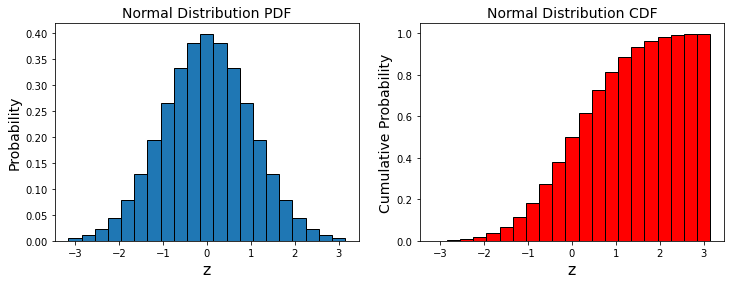

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1,2, 1)
ax1.bar(xvals,PDF, edgecolor="black", width=stepsize)

ax2 = fig.add_subplot(1,2, 2)
ax2.bar(xvals,CDF, color="red", edgecolor="black", width=stepsize)

ax1.set_xlabel("z", size=16)
ax2.set_xlabel("z", size=16)

ax1.set_title("Normal Distribution PDF", size=14)
ax1.set_ylabel("Probability", size=14)
ax2.set_title("Normal Distribution CDF", size=14)
ax2.set_ylabel("Cumulative Probability", size=14)

fig.show()

## 7+ Manipulating and analysing data

In [11]:
import pandas as pd

# read in external data file
data = pd.read_excel("Files/Case Study Data.xlsx", sheet_name="Data")

cols = ['Project', 'Region', 'Country', 'Type', 'Rating', 
        'Cost.Million.USD','Total.Area.sqm', 'Total.Delivered.kWh']
data[cols]

Project        Region  \
0                              Manitoba Hydro Place      Americas   
1                          Child Development Centre      Americas   
2              FIPKE Centre for Innovative Research      Americas   
3                                     Transoceanica      Americas   
4                                  The Cooper Union      Americas   
5                             Biodesign Institute B      Americas   
6   DELL Children's Medical Center of Central Texas      Americas   
7                                        Kroon Hall      Americas   
8                   Newark Center at Ohlone College      Americas   
9           Tahoe Center for Environmental Sciences      Americas   
10            Center for Health and Healing, Oregon      Americas   
11                 NREL Research Support Facility 1      Americas   
12                                      Twelve West      Americas   
13                             2000 Tower Oaks Blvd      Americas   
14                                    Regent's Hall      Americas   
15                               Great River Energy      Americas   
16              Lewis & Clark State Office building      Americas   
17                          Johnson Controls Campus      Americas   
18                                   Genzyme Center      Americas   
19                                             CSOB        Europe   
20                                       Lintulahti        Europe   
21                                         EMGP 270        Europe   
22                             Paul Wunderlich-Haus        Europe   
23                     Federal Environmental Agency        Europe   
24                         Heinrich Boll Foundation        Europe   
25                               Solon Corporate HQ        Europe   
26                                  Thyssenkrupp Q1        Europe   
27                                              SAP        Europe   
28                                     Hagaporten 3        Europe   
29                           Eawag Forum Chriesbach        Europe   
30                            Daniel Swarovski Corp        Europe   
31                                   TNT Express HQ        Europe   
32                                3 Assembly Square        Europe   
33                                    Suttie Centre        Europe   
34                                2 Victoria Avenue  Asia-Pacific   
35                                       Workplace6  Asia-Pacific   
36                               One Shelley Street  Asia-Pacific   
37                                  Council House 2  Asia-Pacific   
38                                        The Gague  Asia-Pacific   
39                                     Vanke Center  Asia-Pacific   
40                                 Suzlon One Earth  Asia-Pacific   
41      Keio University 4th Building Hiyoshi Campus  Asia-Pacific   
42                          Epson Innovation Center  Asia-Pacific   
43                                       Honda Wako  Asia-Pacific   
44                                 Nissan Global HQ  Asia-Pacific   
45                         Kansai Electric Power HQ  Asia-Pacific   
46                             Zero Energy Building  Asia-Pacific   
47              School of Art, Design, Media at NTU  Asia-Pacific   
48                 Magic School of Green Technology  Asia-Pacific   

            Country               Type               Rating  Cost.Million.USD  \
0            Canada         Commercial        LEED-Platinum        269.660000   
1            Canada         University        LEED-Platinum         22.310000   
2            Canada         University        Green-Globe-5         30.555000   
3             Chile         Commercial            LEED-Gold         20.924644   
4     United States         University        LEED-Platinum        112.000000   
5     United States         University        LEED-Platinum         78.500000   
6     United States       

In [12]:
# manipulating data
cost_per_square_m = data["Cost.Million.USD"] / data["Total.Area.sqm"]
data["cost_per_square_m"] = cost_per_square_m

In [13]:
# interactive plotting (hover mouse over points)
import plotly.express as px

fig = px.scatter(data, x="Delivered.Intensity.KWh.sqm.y", y="cost_per_square_m", 
                 hover_data=["Project", "Rating"])
fig.update_traces(marker=dict(size=12))